# **Exploratory Data Analysis**

In this section, the dataset will be explored to understand its structure and key features.

**Install RD-Kit.**

RD-Kit is an open-source Python package for data scientists to work with chemistry data.

In [ ]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 11.5 MB/s eta 0:00:00


**Install the other required packages.**

In [ ]:
! pip install py3Dmol

**Import necessary libraries and modules.**

In [ ]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
import py3Dmol
from ipywidgets import interact,fixed,IntSlider
import ipywidgets
from rdkit.Chem import Crippen
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles
import pickle

**Mount the Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the Data.**

In [ ]:
# Reading the SDF file and convert to a Pandas DataFrame
df = PandasTools.LoadSDF('/content/drive/MyDrive/tox21_10k_data_all.sdf')

# Displaying the DataFrame
df.head()

[01:57:49] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[01:57:50] ERROR: Could not sanitize molecule ending on line 21572
[01:57:50] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
[01:57:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[01:57:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[01:57:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[01:57:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[01:57:51] Explicit valence for atom # 2 Si, 8, is greater than permitted
[01:57:51] ERROR: Could not sanitize molecule ending on line 346021
[01:57:51] ERROR: Explicit valence for atom # 2 Si, 8, is greater than permitted
[01:57:52] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[01:57:52] ERROR: Could not sanitize molecule ending on l

,Formula,FW,DSSTox_CID,SR-HSE,ID,ROMol,NR-AR,SR-ARE,NR-Aromatase,NR-ER-LBD,NR-AhR,SR-MMP,NR-ER,NR-PPAR-gamma,SR-p53,SR-ATAD5,NR-AR-LBD
0,C27H25ClN6,468.9806 (35.4535+224.2805+209.2465),25848,0,NCGC00178831-03,<rdkit.Chem.rdchem.Mol object at 0x7df76e150f20>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C20H6Br4Na2O5,691.8542 (645.8757+22.9892+22.9892),5234,0,NCGC00166114-03,<rdkit.Chem.rdchem.Mol object at 0x7df76e150cf0>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C47H83NO17,934.1584 (916.1205+18.0379),28909,0,NCGC00263563-01,<rdkit.Chem.rdchem.Mol object at 0x7df76f47c510>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C52H54N4O12,927.0048 (329.4575+89.0275+89.0275+329.4575+90...,5513,1,NCGC00013058-02,<rdkit.Chem.rdchem.Mol object at 0x7df76f47c900>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C66H87N17O14,1342.5025 (1282.4505+60.0520),26683,NaN,NCGC00167516-01,<rdkit.Chem.rdchem.Mol object at 0x7df76f47c970>,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The errors were ignored for the futher analysis.

**EDA**

In [ ]:
#Checking for NaN values and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11759 entries, 0 to 11763
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Formula        11759 non-null  object
 1   FW             11759 non-null  object
 2   DSSTox_CID     11759 non-null  object
 3   SR-HSE         8147 non-null   object
 4   ID             11759 non-null  object
 5   ROMol          11759 non-null  object
 6   NR-AR          9358 non-null   object
 7   SR-ARE         7165 non-null   object
 8   NR-Aromatase   7222 non-null   object
 9   NR-ER-LBD      8749 non-null   object
 10  NR-AhR         8165 non-null   object
 11  SR-MMP         7317 non-null   object
 12  NR-ER          7694 non-null   object
 13  NR-PPAR-gamma  8180 non-null   object
 14  SR-p53         8630 non-null   object
 15  SR-ATAD5       9087 non-null   object
 16  NR-AR-LBD      8595 non-null   object
dtypes: object(17)
memory usage: 1.6+ MB


*Generating SMILES*

SMILES is a string of text that represents the structure of a molecule, including information about atoms, bonds, and connectivity.

In [ ]:
df['SMILES'] = df['ROMol'].apply(lambda x: Chem.MolToSmiles(x) if x is not None else None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11759 entries, 0 to 11763
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Formula        11759 non-null  object
 1   FW             11759 non-null  object
 2   DSSTox_CID     11759 non-null  object
 3   SR-HSE         8147 non-null   object
 4   ID             11759 non-null  object
 5   ROMol          11759 non-null  object
 6   NR-AR          9358 non-null   object
 7   SR-ARE         7165 non-null   object
 8   NR-Aromatase   7222 non-null   object
 9   NR-ER-LBD      8749 non-null   object
 10  NR-AhR         8165 non-null   object
 11  SR-MMP         7317 non-null   object
 12  NR-ER          7694 non-null   object
 13  NR-PPAR-gamma  8180 non-null   object
 14  SR-p53         8630 non-null   object
 15  SR-ATAD5       9087 non-null   object
 16  NR-AR-LBD      8595 non-null   object
 17  SMILES         11759 non-null  object
dtypes: object(18)
memory usage: 1.7

*Visualization*

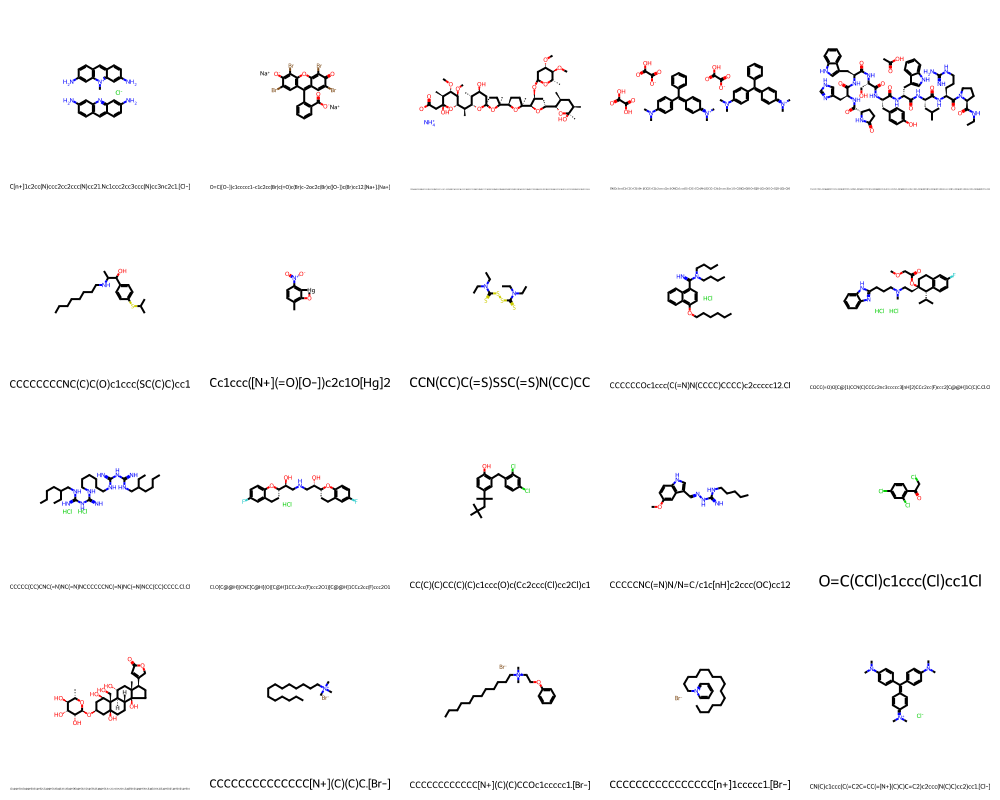

In [ ]:
number_to_print = 20
mols = df['ROMol'][:number_to_print]

# MolsToGridImage allows to show several molecules in a grid
Draw.MolsToGridImage(
    mols,
    molsPerRow=5,
    useSVG=True,
    legends=list(df['SMILES'][:number_to_print].values)
)

*3D visualization*

In [ ]:
def show3D_molecule(idx, style):
    """
    Show molecule in 3D
    """
    mblock = Chem.MolToMolBlock(df['ROMol'].iloc[idx])
    viewer = py3Dmol.view(width=300, height=300)
    viewer.addModel(mblock, 'ROMol')
    viewer.setStyle({style:{}})
    viewer.rotate(45, "y", animationDuration=1)

    viewer.zoomTo()

    print(f"SMILES notation: {df['SMILES'].iloc[idx]}\nRotate me!");

    return viewer.show()

interact(show3D_molecule,
         idx=ipywidgets.IntSlider(min=0,max=len(df["ROMol"])-1,
                                  step=1, value=3064,
                                  description="Molecule"),
         style=ipywidgets.Dropdown(options=['line', 'stick', 'sphere'],
                                   value='stick',
                                   description='Style:'));

interactive(children=(IntSlider(value=3064, description='Molecule', max=11763), Dropdown(description='Style:',…